<a href="https://colab.research.google.com/github/karthikeyapolakonda/B2.-Black-Friday-Sales-Prediction/blob/main/B2_Black_Friday_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("pastel")

In [ ]:
data = pd.read_csv("BlackFridaySales.csv")
print("Dataset Loaded Successfully!")
print("Shape:", data.shape)
display(data.head())

Dataset Loaded Successfully!
Shape: (550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
print("\n📊 Dataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ 

In [ ]:
data["Product_Category_2"].fillna(0, inplace=True)
data["Product_Category_3"].fillna(0, inplace=True)

data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace('4+', '4').astype(int)

print("\nMissing values handled and Stay_In_Current_City_Years cleaned!")


Missing values handled and Stay_In_Current_City_Years cleaned!


/tmp/ipython-input-307005725.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Product_Category_2"].fillna(0, inplace=True)
/tmp/ipython-input-307005725.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
X = data.drop(['User_ID', 'Product_ID', 'Purchase'], axis=1)
y = data['Purchase']

In [ ]:
for col in ['Gender', 'Age', 'City_Category']:
    X[col] = LabelEncoder().fit_transform(X[col])

In [ ]:
X = X.apply(pd.to_numeric)
print("\nAll features are numeric. Ready for modeling!")
print(X.dtypes)


All features are numeric. Ready for modeling!
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and test sets successfully!")
print("Training Size:", X_train.shape)
print("Test Size:", X_test.shape)


Data split into training and test sets successfully!
Training Size: (440054, 9)
Test Size: (110014, 9)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\nLinear Regression Results:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression Results:
R² Score: 0.15099132139602212
RMSE: 4618.695144021097


In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Results:
R² Score: 0.6274843358555339
RMSE: 3059.394647572623


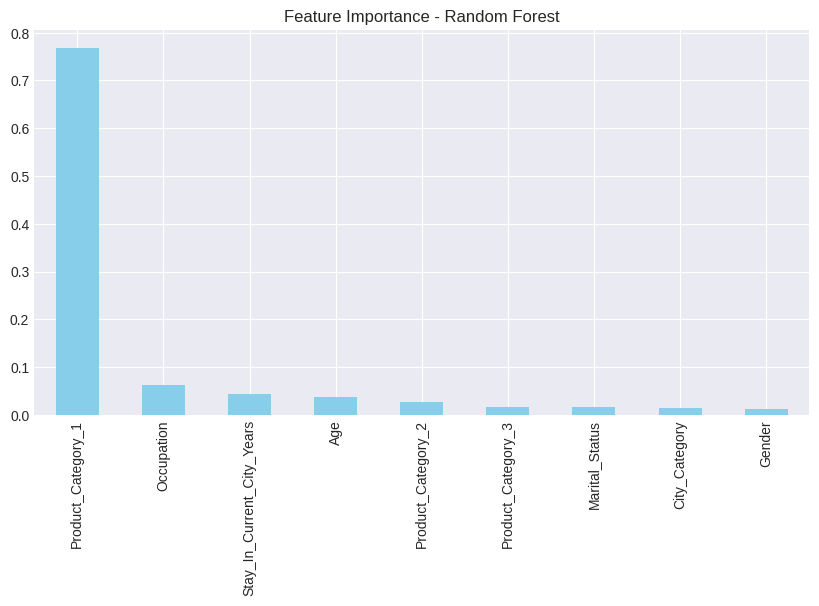

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
importances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.show()

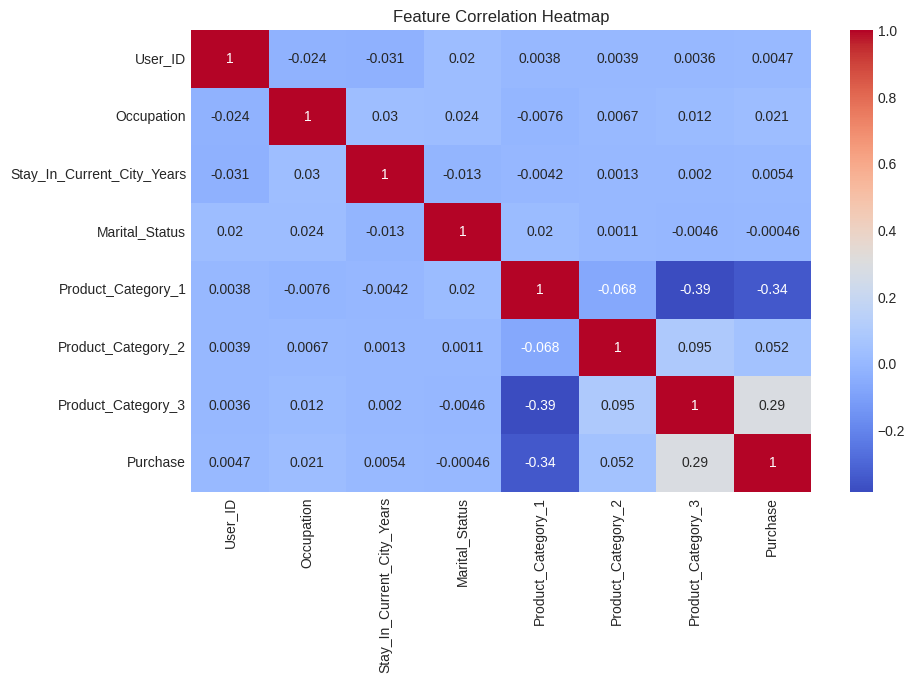

In [ ]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
sample_data = {
    'Gender': 'M',
    'Age': '26-35',                    # Age group
    'Occupation': 12,                  # Occupation code (numeric)
    'City_Category': 'B',              # City category
    'Stay_In_Current_City_Years': '2', # Years in current city
    'Marital_Status': 0,               # 0 = Single, 1 = Married
    'Product_Category_1': 5,
    'Product_Category_2': 10,
    'Product_Category_3': 0
}

sample_df = pd.DataFrame([sample_data])

from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
le_gender.fit(data['Gender'])
sample_df['Gender'] = le_gender.transform(sample_df['Gender'])

le_age = LabelEncoder()
le_age.fit(data['Age'])
sample_df['Age'] = le_age.transform(sample_df['Age'])

le_city = LabelEncoder()
le_city.fit(data['City_Category'])
sample_df['City_Category'] = le_city.transform(sample_df['City_Category'])

sample_df['Stay_In_Current_City_Years'] = sample_df['Stay_In_Current_City_Years'].replace('4+', '4').astype(int)

sample_df = sample_df.apply(pd.to_numeric)

predicted_purchase = rf.predict(sample_df)
print("Predicted Purchase Amount: ₹", round(predicted_purchase[0], 2))


Predicted Purchase Amount: ₹ 7616.52
